In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
    
def revread(f):
    return np.array(list(map(float, f.read().replace(',', '.').split())))

def show_distrib(distrib):       #
    for i in range(len(distrib)):
        print(distrib[i], end="\t")
        if (i+1)%10==0:
            print()
    print()


f = open('sel.txt') # ('sel2.txt') - равномерная выборка
distrib = revread(f)
#show_distrib(distrib)


distrib.sort()
print("\nСортированная выборка :\n")
#show_distrib(distrib)

sterges_coef = 1 + math.floor(math.log2(distrib.size))
print("Коэффициент Стерджеса =", sterges_coef)
h = (distrib[distrib.size-1] - distrib[0])/sterges_coef

# a=4.80; b=13.3
#h = (13.3-4.80)/sterges_coef
print("h =",h)
selection = [distrib[0]]
# print(selection)
for i in range(sterges_coef):
    selection.append(selection[i] + h)
    
#print("Группированная выборка:\n")
#for i in range(len(selection)-1):
#    print("["+ str(round(selection[i], 5)) + ", " + str(round(selection[i+1], 5)) + "]", end=" ")
selection = np.array(selection)
# частота 
k=0
frequency =[0] 
distrib[distrib.size-1]-=0.001

for i in range(distrib.size):
    if k < len(selection)-1:
        if distrib[i] < selection[k+1]:
            frequency[k]+=1
        else:
            #print(distrib[i])
            #print(selection[k+1])
            frequency.append(1)
            k+=1
                  
frequency = np.array(frequency)

# относительная частота
relative_frequency = []
for i in range(len(frequency)):
    relative_frequency.append(frequency[i]/distrib.size)
    
relative_frequency = np.array(relative_frequency)

check=0
for i in range(len(relative_frequency)):
    check += relative_frequency[i]
    
print("Сумма элементов относительной частоты =", round(check, 1))


print("Группированная выборка:\t", end = " ")
for i in range(len(selection)-1):
    print("["+ str(round(selection[i], 5)) + ", " + str(round(selection[i+1], 5)) + "]", end="\t")
print("\nЧастота:\t", end=" ")
for i in range(len(frequency)):
    print(frequency[i], end="\t")
print("\nОтносительная частота:\t", end=" ")
for i in range(len(relative_frequency)):
    print(relative_frequency[i], end="\t")

# Оценки матожидания и дисперсии
as_average=0
x=[]
for i in range(selection.size-1):
    x.append((selection[i]+selection[i+1])/2)
    as_average+=(selection[i]+selection[i+1])*relative_frequency[i]/2

print("\nОценка мат ожидания:\n",as_average)

as_disp = 0
for i in range(selection.size-1):
    as_disp += (((selection[i]+selection[i+1])/2)**2)*relative_frequency[i]
as_disp = as_disp - as_average**2 - (h**2)/12

print("\nОценка дисперсии:\n",as_disp)

as_disp = math.sqrt(as_disp)
print("\nсреднее квадратическое отклонение:\n",as_disp)
    


Сортированная выборка :

Коэффициент Стерджеса = 9
h = 1.1536377777777778
Сумма элементов относительной частоты = 1.0
Группированная выборка:	 [0.29935, 1.45299]	[1.45299, 2.60663]	[2.60663, 3.76026]	[3.76026, 4.9139]	[4.9139, 6.06754]	[6.06754, 7.22118]	[7.22118, 8.37481]	[8.37481, 9.52845]	[9.52845, 10.68209]	
Частота:	 4	13	47	67	74	41	19	3	2	
Относительная частота:	 0.014814814814814815	0.04814814814814815	0.17407407407407408	0.24814814814814815	0.2740740740740741	0.15185185185185185	0.07037037037037037	0.011111111111111112	0.007407407407407408	
Оценка мат ожидания:
 4.977992098765432

Оценка дисперсии:
 2.6428650330189813

среднее квадратическое отклонение:
 1.6256890948207106


In [19]:
table = pd.DataFrame(selection, columns=['a_k'])

table['(a_k - av)/s']=[(selection[i] - as_average)/as_disp for i in range(selection.size)]

table['ф(a_k - av/s)/s']=[(ss.norm.pdf(table['(a_k - av)/s'][i])/as_disp) for i in range(table['(a_k - av)/s'].size)]

table['Ф(a_k - av/s)']=[ss.norm.cdf(table['(a_k - av)/s'][i]) for i in range(table['(a_k - av)/s'].size)]

prob=['-']
prob.append(table['Ф(a_k - av/s)'][1])
for i in range(2, table['Ф(a_k - av/s)'].size-1):
    prob.append(table['Ф(a_k - av/s)'][i] - table['Ф(a_k - av/s)'][i-1])
print()
prob.append(1 - table['Ф(a_k - av/s)'][table['Ф(a_k - av/s)'].size -2])

k=['-']
k += list(np.full(9, 1/9))

table['p*']=prob    #  - для нормального

check=0
for i in range(1,table['p*'].size):
    check += table['p*'][i]
#print(check)
table

,a_k,(a_k - av)/s,ф(a_k - av/s)/s,Ф(a_k - av/s),p*
0,0.299350,-2.877944,0.003902,0.002001,-
1,1.452988,-2.168314,0.023385,0.015067,0.0150674
2,2.606626,-1.458684,0.084691,0.072326,0.0572587
3,3.760263,-0.749054,0.185368,0.226912,0.154586
4,4.913901,-0.039424,0.245208,0.484276,0.257364
5,6.067539,0.670206,0.196036,0.748637,0.264361
6,7.221177,1.379836,0.094719,0.916181,0.167545
7,8.374814,2.089466,0.027659,0.981667,0.0654857
8,9.528452,2.799096,0.004881,0.997438,0.0157706
9,10.682090,3.508726,0.000521,0.999775,0.00256229


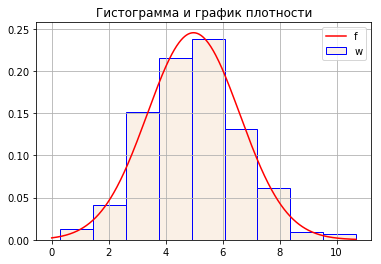

In [20]:
# Гистограмма и график
hist = []
#print("h=", h)
for i in range(relative_frequency.size):
    hist.append(relative_frequency[i]/h)

#if len(hist) > len(x):
#    del hist[-1]
y = np.linspace(0, selection[selection.size -1], num=500)
print()
func = lambda x: ss.norm.pdf(x, loc=as_average, scale=as_disp)#  - для нормального распределения


pdf = np.array([func(i) for i in y])

fig = plt.figure()
plt.bar(x, hist, width=h, color='linen', edgecolor='b', label='w')
plt.plot(y, pdf, 'r', label='f')
plt.legend(loc='upper right')
#plt.xlabel("a_k")
plt.title("Гистограмма и график плотности")
plt.grid(True)
plt.show()

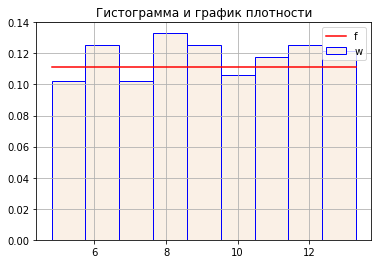

In [9]:
# Гистограмма и график для равномерного распределения

hist = []
#print("h=", h)
for i in range(relative_frequency.size):
    hist.append(relative_frequency[i]/h)

#if len(hist) > len(x):
#    del hist[-1]
y = np.linspace(selection[0], selection[selection.size -1], num=500)
print()
# a=4.80; b=13.3

pdf = np.array([1/9 for i in y])

fig = plt.figure()
plt.bar(x, hist, width=h, color='linen', edgecolor='b', label='w')
plt.plot(y, pdf, 'r', label='f') 
plt.legend(loc='upper right')
#plt.xlabel("a_k")
plt.title("Гистограмма и график плотности")
plt.grid(True)
plt.show()

In [23]:
# Критерий хи-квадрат для нормального и таблица
#  - для нормального распределения
p=[]
abs_p=[]
сhi_squared=[]

for i in range(1, table['p*'].size):
    p.append(table['p*'][i])
    abs_p.append( abs(relative_frequency[i-1] - table['p*'][i]) )
    сhi_squared.append(270*(relative_frequency[i-1] - table['p*'][i])**2 / table['p*'][i])
#print("chi-squared=", сhi_squared)

norm_table = pd.DataFrame(relative_frequency, columns=['w'])
norm_table['[ai, ai+1]'] = [[0.29935, 1.45299],[1.45299, 2.60663],[2.60663, 3.76026],[3.76026, 4.9139],[4.9139, 6.06754],[6.06754, 7.22118],[7.22118, 8.37481],[8.37481, 9.52845],[9.52845, 10.68209]]
norm_table['p*']=p
norm_table['|w-p*|']=abs_p     
norm_table['сhi_squared']=сhi_squared                 
norm_table

m=-1
q=0
for i in range(1, norm_table['сhi_squared'].size):
    if norm_table['|w-p*|'][i] > m:
        m=norm_table['|w-p*|'][i]
    q+=norm_table['сhi_squared'][i]
print("Хи-квадрат=", q, "\nMax |w-p*| =", m)

norm_table

Хи-квадрат= 4.580773132936173 
Max |w-p*| = 0.019487777928370892


,w,"[ai, ai+1]",p*,|w-p*|,сhi_squared
0,0.014815,"[0.29935, 1.45299]",0.015067,0.000253,0.001143
1,0.048148,"[1.45299, 2.60663]",0.057259,0.009111,0.391388
2,0.174074,"[2.60663, 3.76026]",0.154586,0.019488,0.663311
3,0.248148,"[3.76026, 4.9139]",0.257364,0.009216,0.089099
4,0.274074,"[4.9139, 6.06754]",0.264361,0.009713,0.096365
5,0.151852,"[6.06754, 7.22118]",0.167545,0.015693,0.396857
6,0.070370,"[7.22118, 8.37481]",0.065486,0.004885,0.098377
7,0.011111,"[8.37481, 9.52845]",0.015771,0.004659,0.371699
8,0.007407,"[9.52845, 10.68209]",0.002562,0.004845,2.473676


In [10]:
# Критерий хи-квадрат для равномерного

p=[]
abs_p=[]
сhi_squared=[]

for i in range(1, table['p*'].size):
    p.append(table['p*'][i])
    abs_p.append( abs(relative_frequency[i-1] - table['p*'][i]) )
    сhi_squared.append(270*(relative_frequency[i-1] - table['p*'][i])**2 / table['p*'][i])
#print("chi-squared=", сhi_squared)

norm_table = pd.DataFrame(relative_frequency, columns=['w'])
norm_table['[ai, ai+1]'] = [[4.80578, 5.75022],[5.75022, 6.69467],[6.69467, 7.63911],[7.63911, 8.58356],[8.58356, 9.528],[9.528, 10.47245],[10.47245, 11.41689],[11.41689, 12.36134],[12.36134, 13.30578]]
norm_table['p*']=p
norm_table['|w-p*|']=abs_p     
norm_table['сhi_squared']=сhi_squared                 
norm_table

m=-1
q=0
for i in range(1, norm_table['сhi_squared'].size):
    if norm_table['|w-p*|'][i] > m:
        m=norm_table['|w-p*|'][i]
    q+=norm_table['сhi_squared'][i]
print("Хи-квадрат=", q, "\nMax |w-p*| =", m)

norm_table

Хи-квадрат= 1.7999999999999998 
Max |w-p*| = 0.014814814814814808


,w,"[ai, ai+1]",p*,|w-p*|,сhi_squared
0,0.096296,"[4.80578, 5.75022]",0.111111,0.014815,0.533333
1,0.118519,"[5.75022, 6.69467]",0.111111,0.007407,0.133333
2,0.096296,"[6.69467, 7.63911]",0.111111,0.014815,0.533333
3,0.125926,"[7.63911, 8.58356]",0.111111,0.014815,0.533333
4,0.118519,"[8.58356, 9.528]",0.111111,0.007407,0.133333
5,0.100000,"[9.528, 10.47245]",0.111111,0.011111,0.300000
6,0.111111,"[10.47245, 11.41689]",0.111111,0.000000,0.000000
7,0.118519,"[11.41689, 12.36134]",0.111111,0.007407,0.133333
8,0.114815,"[12.36134, 13.30578]",0.111111,0.003704,0.033333
